# Census Income Project
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

dfc=pd.read_csv('census_income.csv')
dfc

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis

In [3]:
dfc.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
dfc.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
dfc.sample(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
9443,50,Private,120914,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7031,27,Private,151382,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Male,0,974,40,United-States,<=50K
12194,27,Private,110648,Bachelors,13,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States,<=50K


In [6]:
#Checking the shape of data
dfc.shape

(32560, 15)

There are 32560 rows and 15 columns

In [7]:
# Checking the information of data
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Checking the data types
dfc.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are 9 object data type and 6 integer data type

In [9]:
# Checking the count of Marital Status
dfc['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Married-civ-spouse count is high 14976

In [10]:
# Checking the count of Male and Female
dfc['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

Male count is 21789 and Female count is 10771.
Majority of Male count is high as compare with Female

In [11]:
# Checking the column name
dfc.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
# Checking the statistical summary of data
dfc.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
dfc.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [14]:
# Checking the unique value in data
dfc.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [15]:
# Checking the count of people that belongs to native country
dfc['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

More people belongs to United State

In [16]:
# Checking the count of Education that people have completed
dfc['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Majority of people completed HS-grad

In [17]:
#Checking the relationship count
dfc['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [18]:
# Checking the Missing value

dfc.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
dfc.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing value present in data

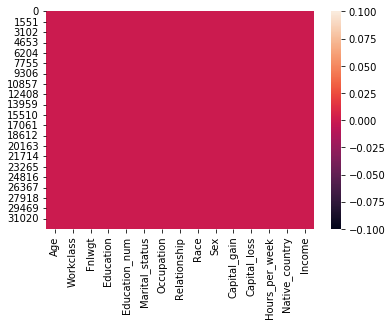

In [20]:
sns.heatmap(dfc.isnull())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


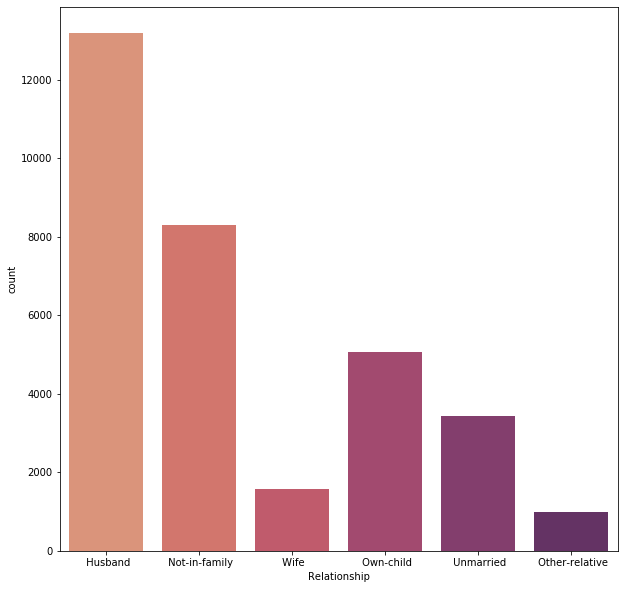

In [21]:
#Viewing the Relationship using countplot
print(dfc['Relationship'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(dfc['Relationship'],palette='flare')

 Male      21789
 Female    10771
Name: Sex, dtype: int64


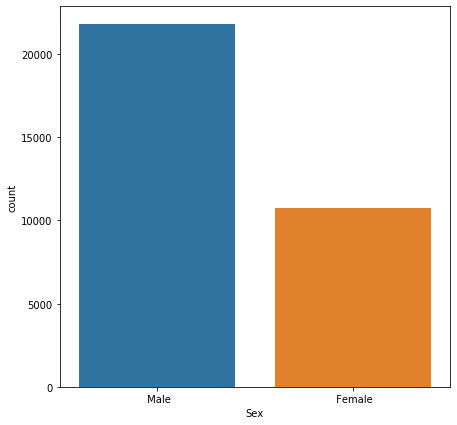

In [22]:
print(dfc['Sex'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(dfc['Sex'])

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

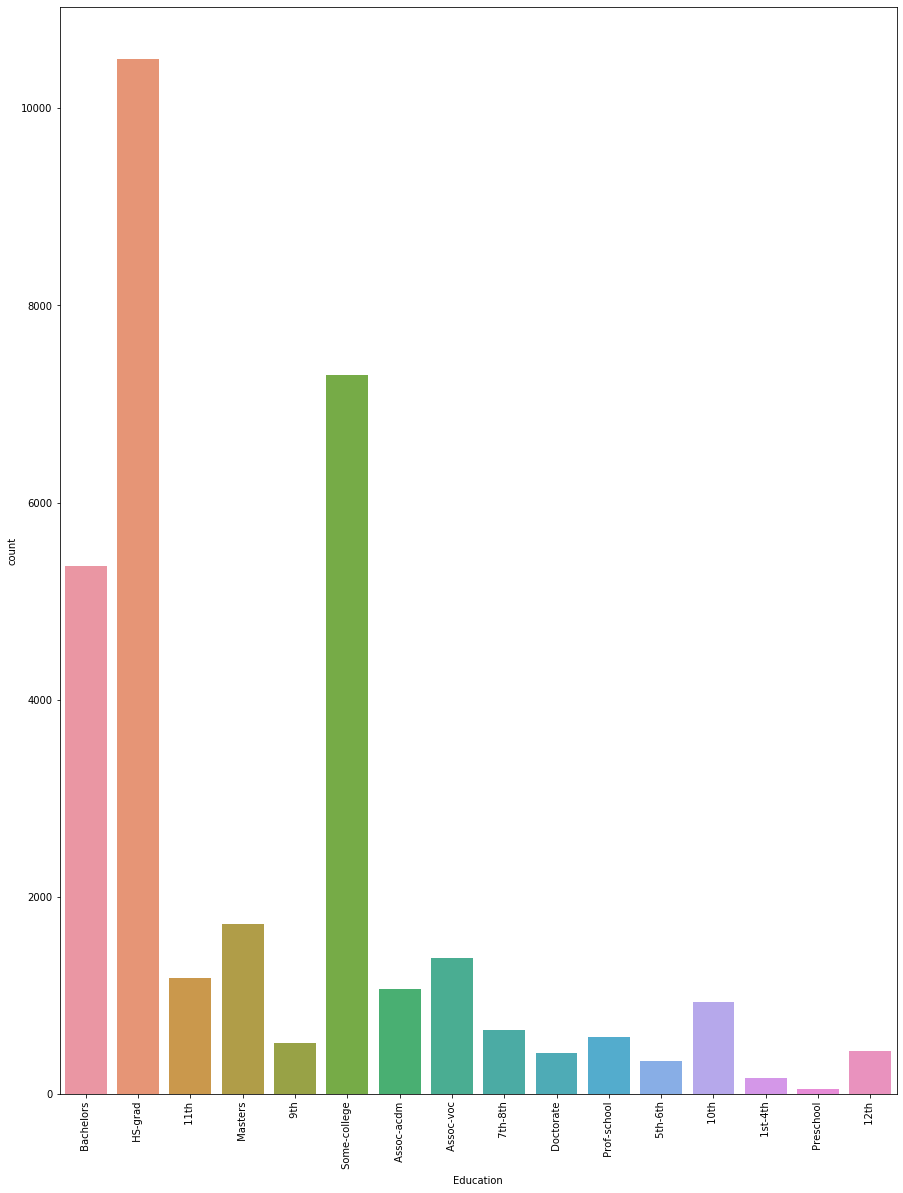

In [23]:
# Viewing the Education count using countplot
print(dfc['Education'].value_counts())
plt.figure(figsize=(15,20))
sns.countplot(dfc['Education'])
plt.xticks(rotation=90)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

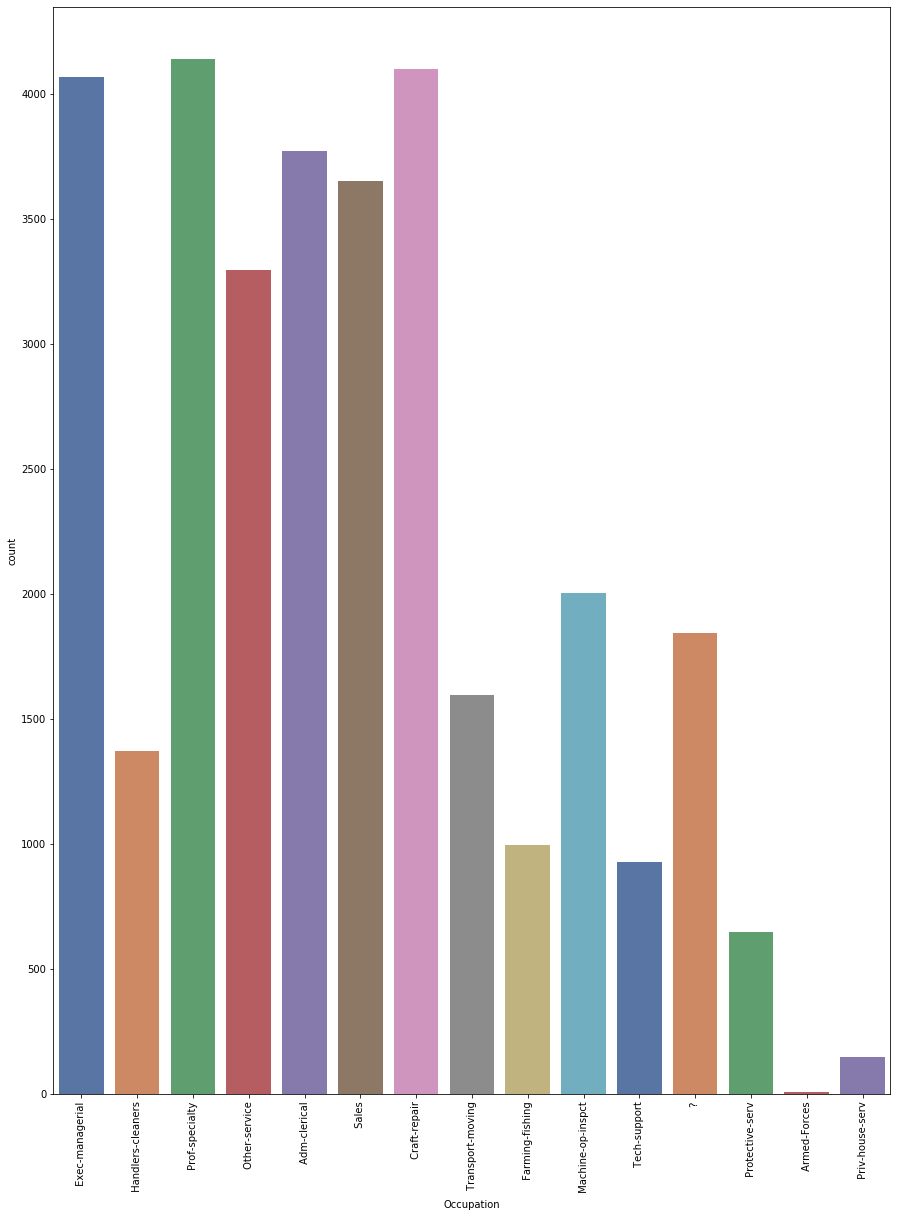

In [24]:
# Viewing the Occupation using countplot
print(dfc['Occupation'].value_counts())
plt.figure(figsize=(15,20))
sns.countplot(dfc['Occupation'],palette='deep')
plt.xticks(rotation=90)

Majority of People occupation is Pro-specialty

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

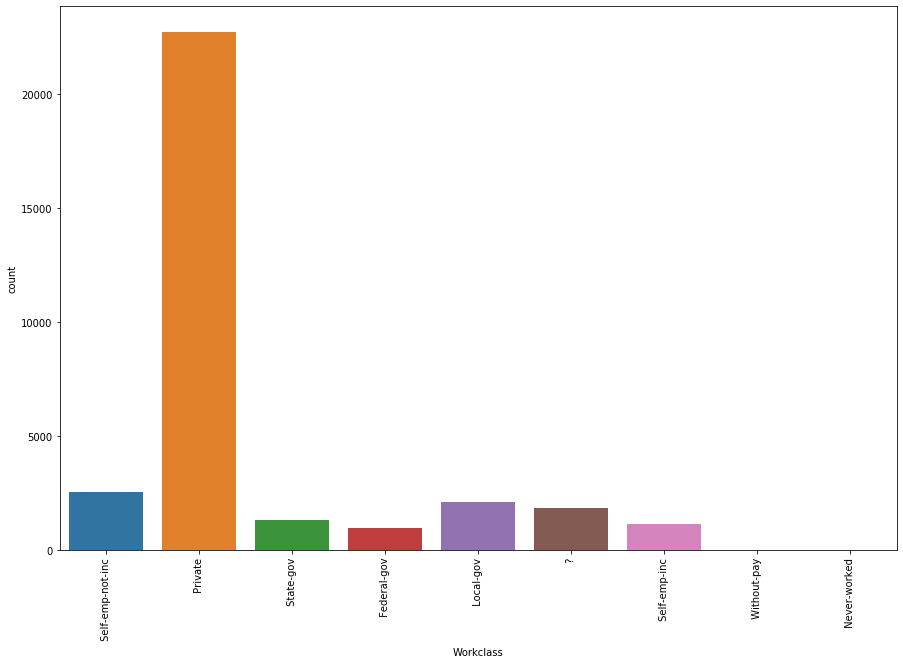

In [25]:
print(dfc['Workclass'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(dfc['Workclass'])
plt.xticks(rotation=90)

Majority of people work in Private class

# Replacing '?' with Mode value

There is "?" in Work Class. Let's replace with mode

In [26]:
dfc['Workclass'].mode()

0     Private
dtype: object

In [27]:
# The mode of workclass is private, so lets replace the '?' with 'Private'
dfc['Workclass']=dfc['Workclass'].str.replace('?','Private')

In [28]:
dfc['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

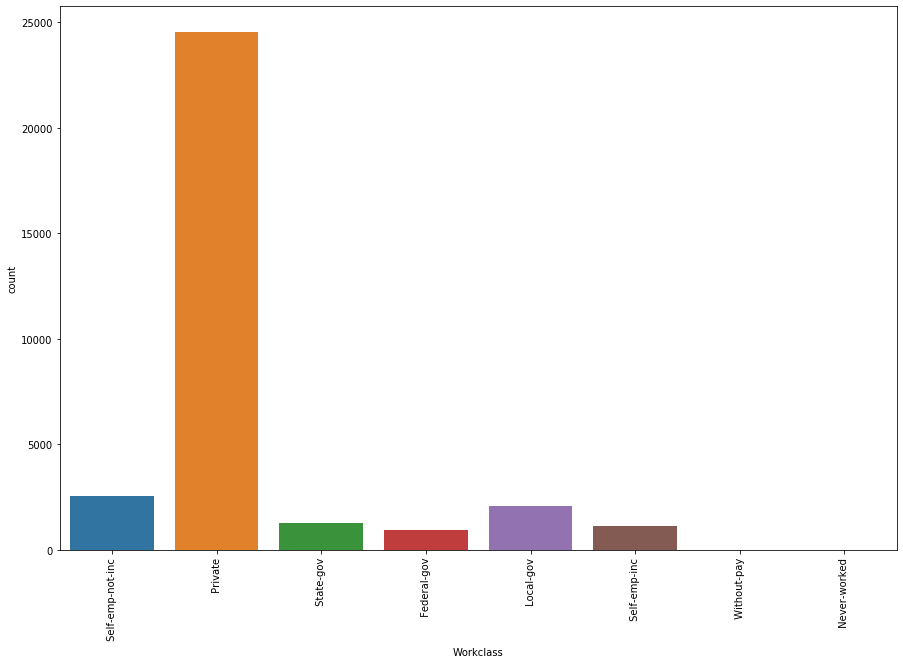

In [29]:
# Viewing the Workclass after replace the '?'
print(dfc['Workclass'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(dfc['Workclass'])
plt.xticks(rotation=90)

As we see there is no ? as we have changed to Private. Now private count is 24532

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

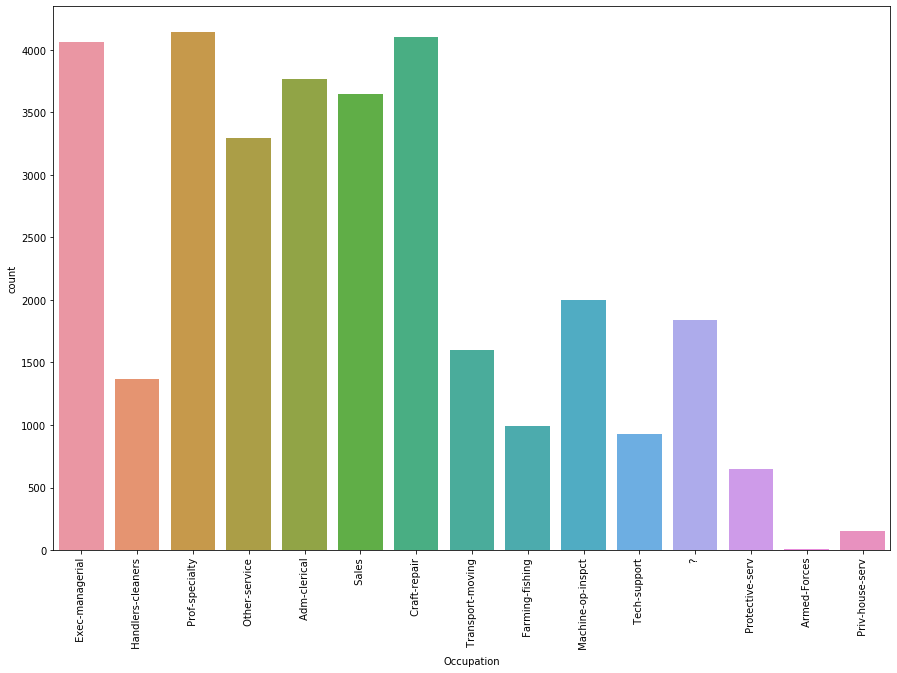

In [30]:
print(dfc['Occupation'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(dfc['Occupation'])
plt.xticks(rotation=90)

In Occupation also there is '?'. Let's replace with Mode

In [31]:
dfc['Occupation'].mode()

0     Prof-specialty
dtype: object

Mode is Prof-specialty. As it repeated often

In [32]:
# Lets replace '?' with Prof-specialty
dfc['Occupation'] = dfc.Occupation.str.replace('?', 'Prof-specialty')

In [33]:
dfc['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

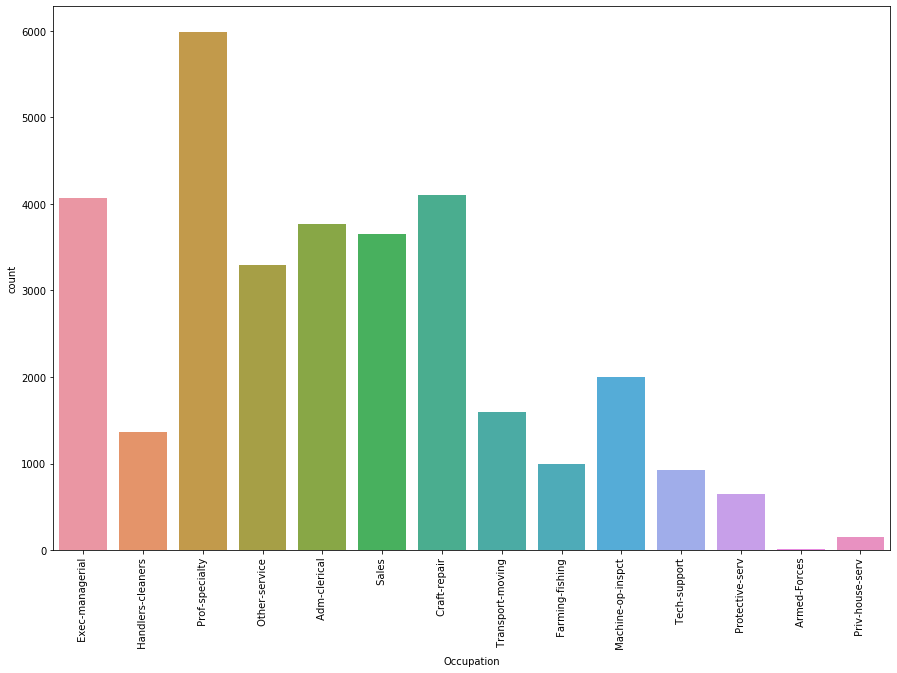

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(dfc['Occupation'])
plt.xticks(rotation=90)

In [35]:
dfc['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In Native country also there is ?, let's replace with Mode

In [36]:
dfc['Native_country'].mode()

0     United-States
dtype: object

In [37]:
#Replacing '?' with 'United-States'
dfc['Native_country']=dfc['Native_country'].str.replace('?','United-States')

In [38]:
dfc['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [39]:
# Let's see the statistical summary after replace the '?'

dfc.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
dfc['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [41]:
dfc['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In Capital_gain and Capital_loss there are more zero is present. Let's drop the Capital_gain and Capital_loss columns

In [42]:
dfc=dfc.drop(columns=['Capital_gain','Capital_loss'])

In [43]:
dfc.shape

(32560, 13)

In [44]:
dfc.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K


Hence we have removed Capital_gain and Capital_loss column successfully

# Data Visualization

In Data there are both categorical and numerical data. Let's split into two parts. One is categorical and another one is numerical data for visualization

In [45]:
dfc.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [46]:
#Categorical Data
categorical_data=[]
for i in dfc.dtypes.index:
    if dfc.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [47]:
# Numerical Data
numerical_data=[]
for i in dfc.dtypes.index:
    if dfc.dtypes[i]=='int64':
        numerical_data.append(i)
print(numerical_data)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


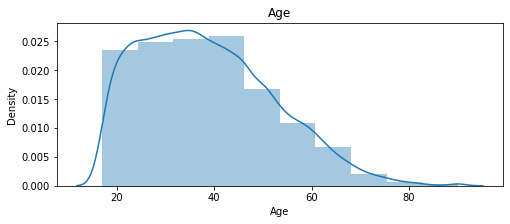

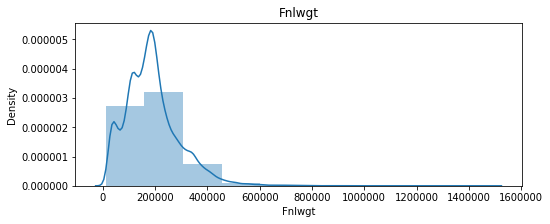

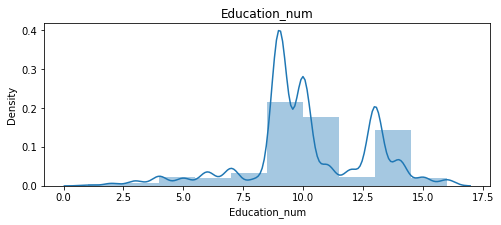

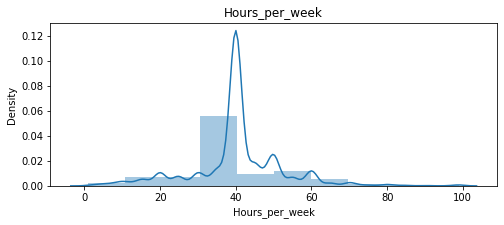

In [48]:
# Viewing the data using distribution plot
for i in dfc[numerical_data]:
    plt.figure(figsize=(8,3))
    sns.distplot(dfc[i],bins=10)
    plt.title(i)
    plt.show()


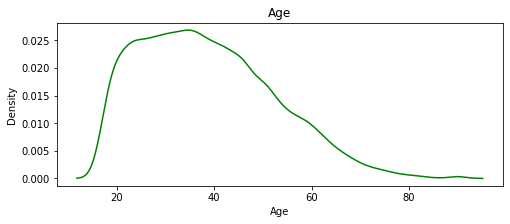

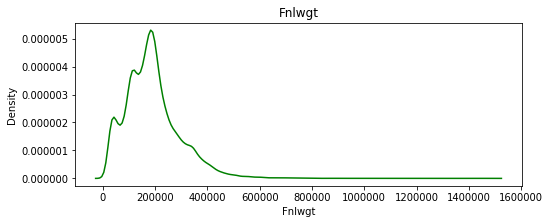

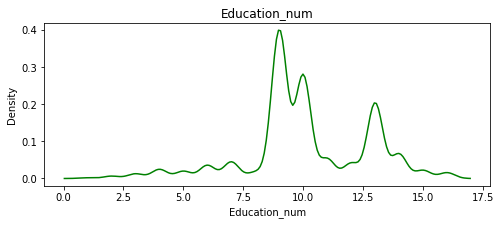

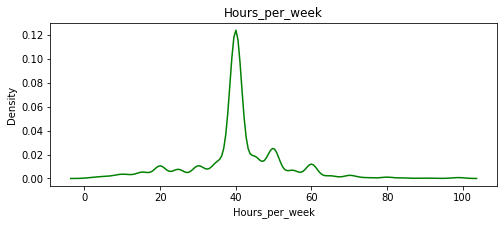

In [49]:
for i in dfc[numerical_data]:
    plt.figure(figsize=(8,3))
    sns.distplot(dfc[i],hist=False,color='green')
    plt.title(i)
    plt.show()

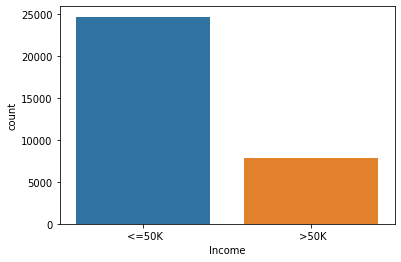

In [50]:
#Viewing the count of income
sns.countplot(dfc['Income'])

Majority of people income is <=50K

In [51]:
dfc['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

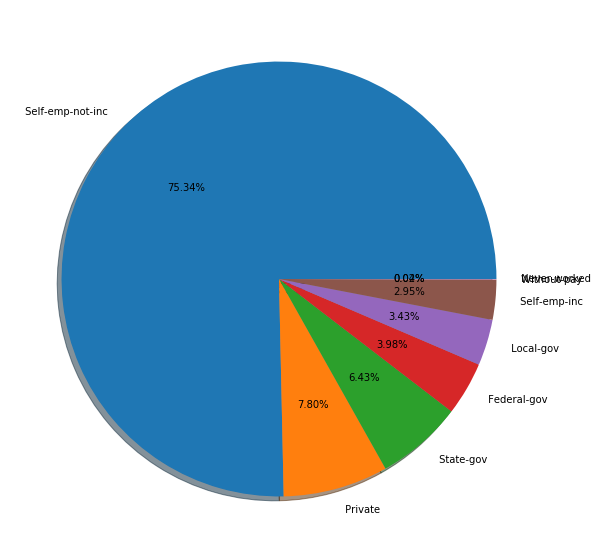

In [52]:
# Viewing the Workclass using Piechart
label=' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'
    
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(dfc['Workclass'].value_counts(),labels=label,autopct='%1.2f%%',shadow=True)
plt.show()

In [53]:
dfc['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

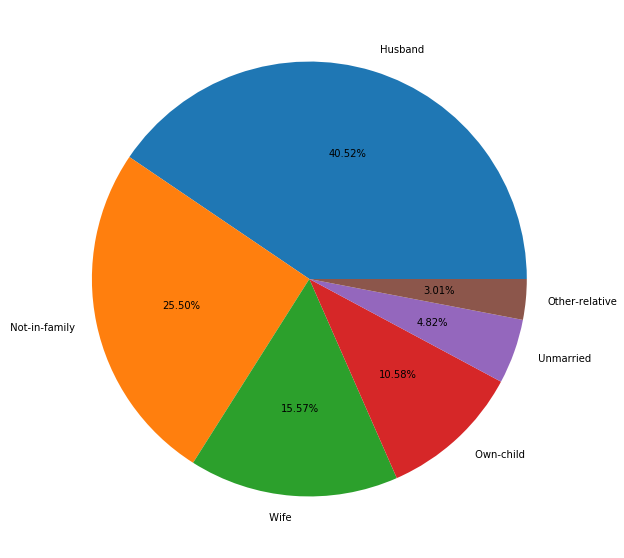

In [54]:
#Viewing the relationship using Pie chart
label='Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried','Other-relative'
    
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(dfc['Relationship'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

In [55]:
# Checking the count of Race
dfc['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<Figure size 2160x1440 with 0 Axes>

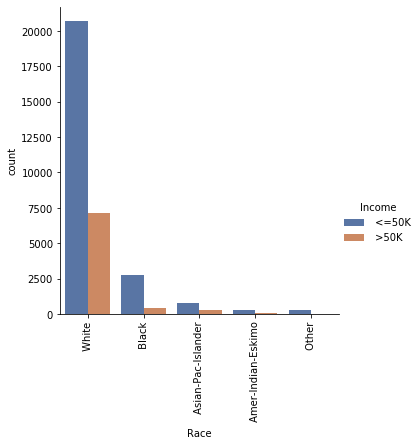

In [56]:
# Viewing the Race count using factorplot
plt.figure(figsize=(30,20))
sns.factorplot('Race',data=dfc,kind='count',hue='Income',palette='deep')
plt.xticks(rotation=90)
plt.show()

White race count is high as compare with others

<Figure size 2160x1440 with 0 Axes>

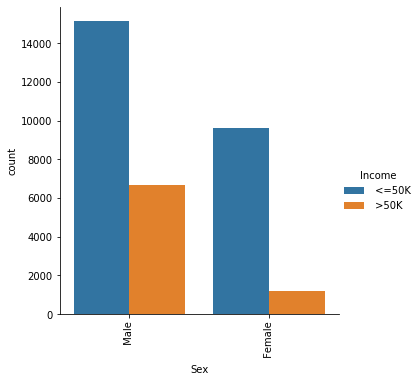

In [57]:
#Viewing the Sex with Income using Factorplot
plt.figure(figsize=(30,20))
sns.factorplot('Sex',data=dfc,kind='count',hue='Income')
plt.xticks(rotation=90)
plt.show()

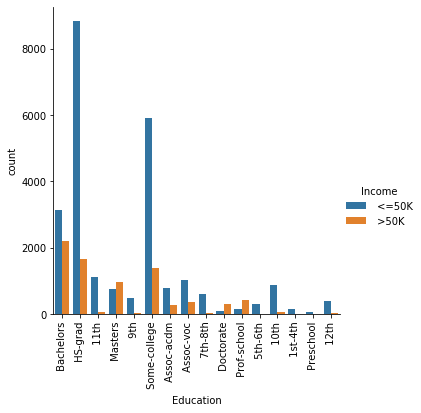

In [58]:

sns.factorplot('Education',data=dfc,kind='count',hue='Income')
plt.xticks(rotation=90)
plt.show()

People who have completed HS-grad earning <=50K

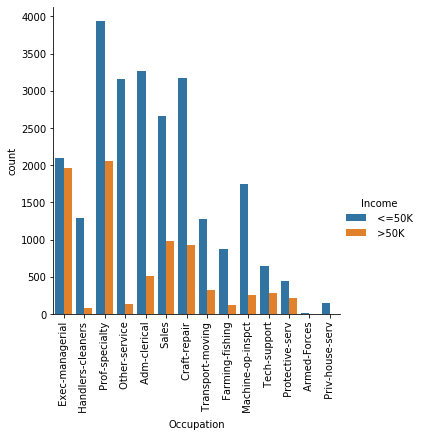

In [59]:

sns.factorplot('Occupation',data=dfc,kind='count',hue='Income')
plt.xticks(rotation=90)
plt.show()

In [60]:
dfc['Sex'].unique()

array([' Male', ' Female'], dtype=object)

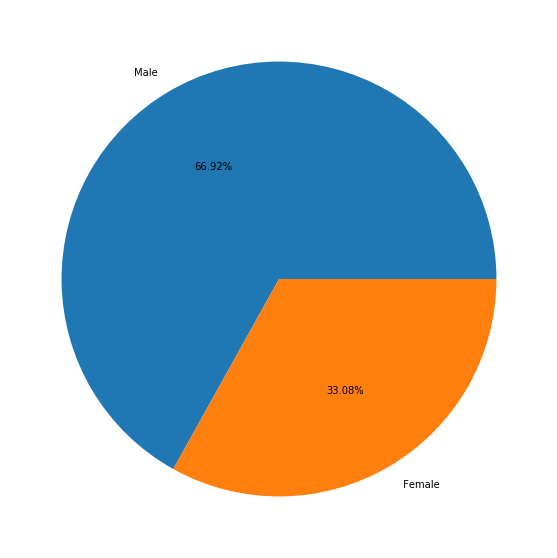

In [61]:
label='Male', ' Female'
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(dfc['Sex'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

Majority of worker is Male 66.92% and female worker is very less 33.08%

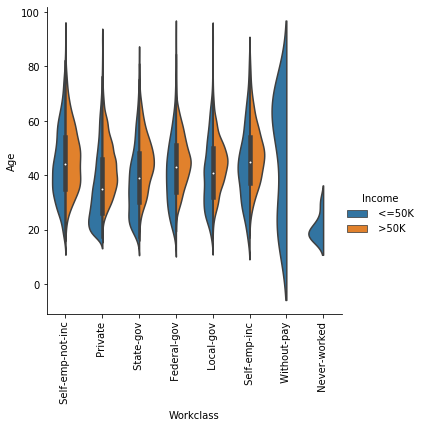

In [62]:

sns.catplot(x='Workclass',y='Age',hue='Income',kind='violin',data=dfc,split=True)
plt.xticks(rotation=90)
plt.show()

Majority of workclass having the income >50 K. Without Pay and Never-worked not having the income >50 K. As they have not worked.

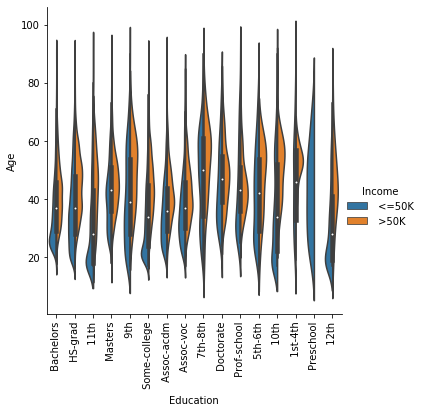

In [63]:
sns.catplot(x='Education',y='Age',data=dfc,kind='violin',split=True,hue='Income')
plt.xticks(rotation=90)
plt.show()

Higher education are earning more than 50K. Preschool is not have the income >50K.

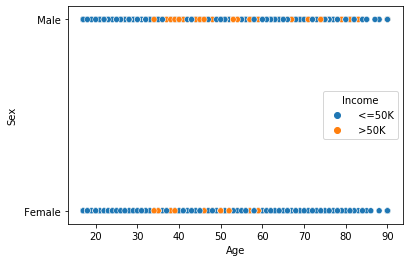

In [64]:
sns.scatterplot(x='Age',y='Sex',data=dfc,hue='Income')

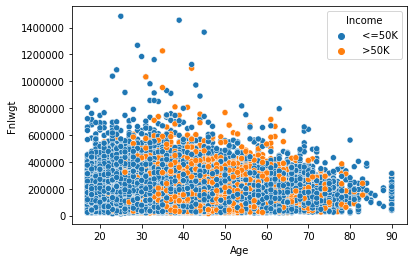

In [65]:
sns.scatterplot(x='Age',y='Fnlwgt',data=dfc,hue='Income')

Majority of people between 35 to 60 years are getting the income more than 50 K. As age increases the income is decreasing. As finalweight increases income is decreasing

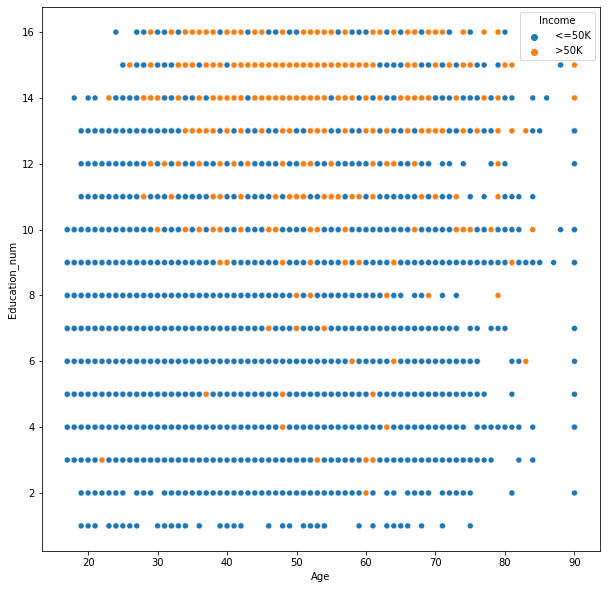

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age',y='Education_num',data=dfc,hue='Income')


The worker whose age is more than 70 there is a high change of not getting the income more than 50 K. As the Education Num increase, there is a high chance that income  also increasing. Those who are haaving high Education Num are getting more than 50K.

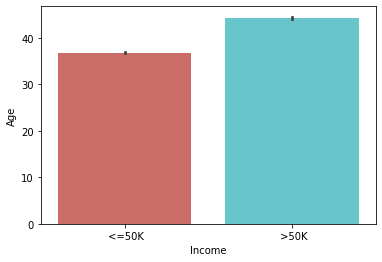

In [67]:
sns.barplot(x='Income',y='Age',data=dfc,palette='hls')

In Age there is a high chance of getting >50K

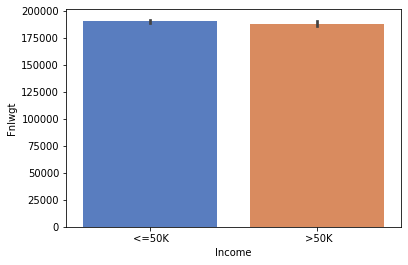

In [68]:
sns.barplot(x='Income',y='Fnlwgt',data=dfc,palette='muted')

In Final weight there is a equal chance of getting income >50K and <=50K

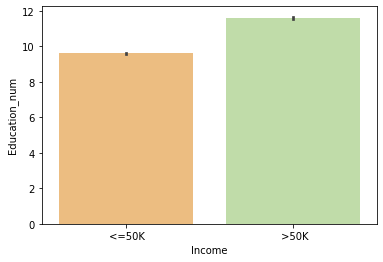

In [69]:
sns.barplot(x='Income',y='Education_num',data=dfc,palette='Spectral')

Higher the Education_num there is a high chance of getting the income >50K

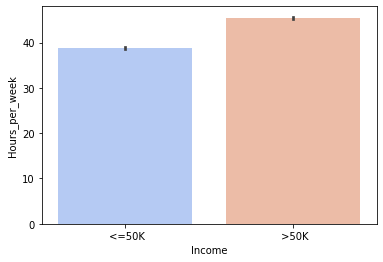

In [70]:
sns.barplot(x='Income',y='Hours_per_week',data=dfc,palette='coolwarm')

As the Hours_per_week increases income is also increasing. The worker who works more hours in week they are getting the income >50K

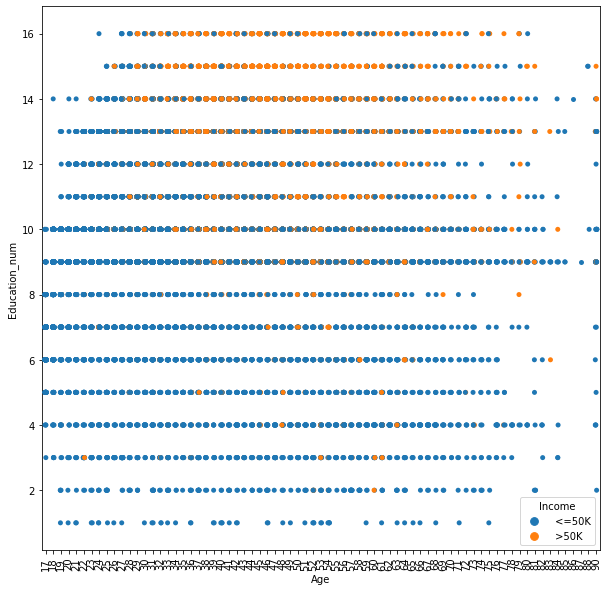

In [71]:
plt.figure(figsize=(10,10))
sns.stripplot(x='Age',y='Education_num',data=dfc,hue='Income')
plt.xticks(rotation=90)
plt.show()

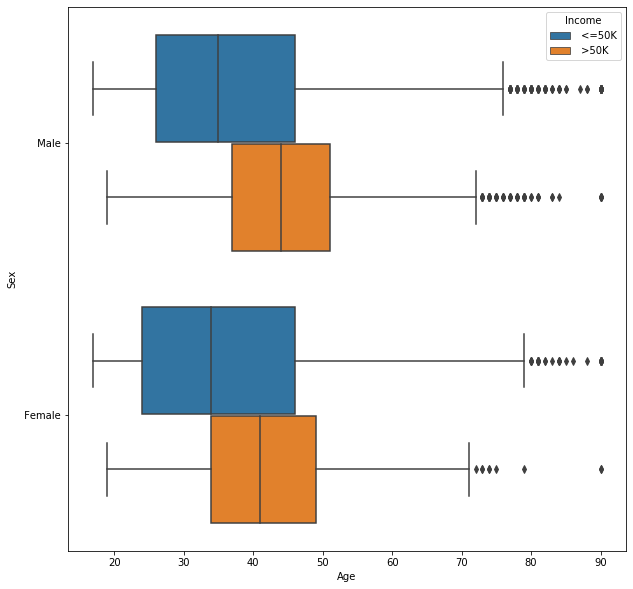

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Age',y='Sex',hue='Income',data=dfc)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

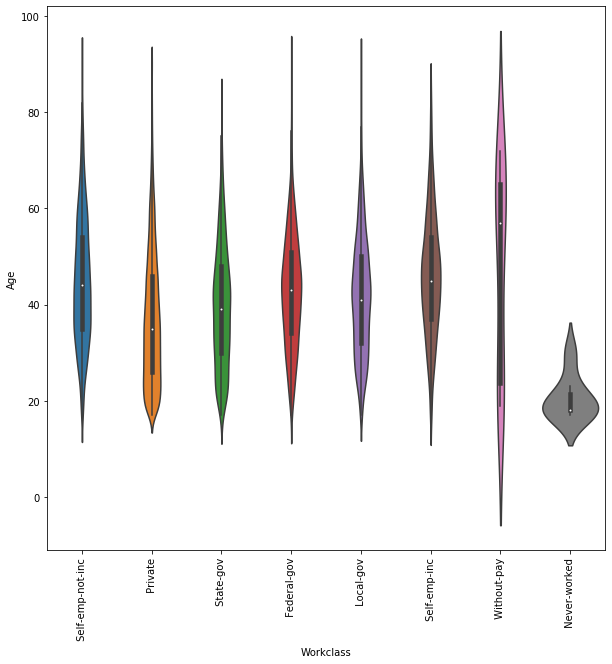

In [73]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Workclass',y='Age',data=dfc)
plt.xticks(rotation=90)

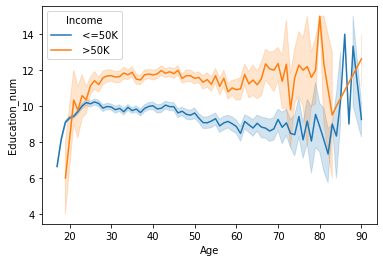

In [74]:
sns.lineplot(x='Age',y='Education_num',data=dfc, hue='Income')

As Education_num increases incomes also increasing

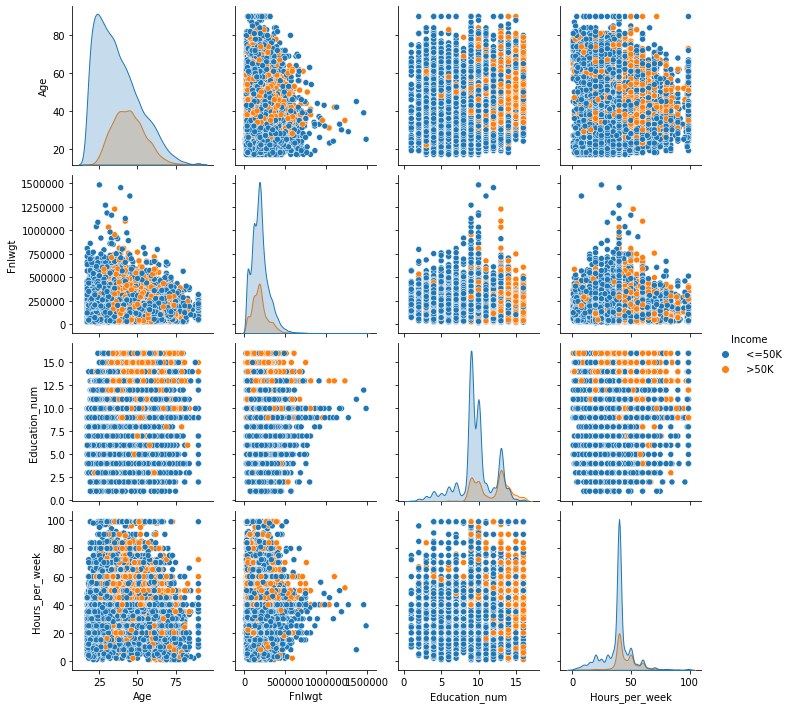

In [75]:
#Checking the pairplot of dfc
sns.pairplot(dfc,hue='Income')

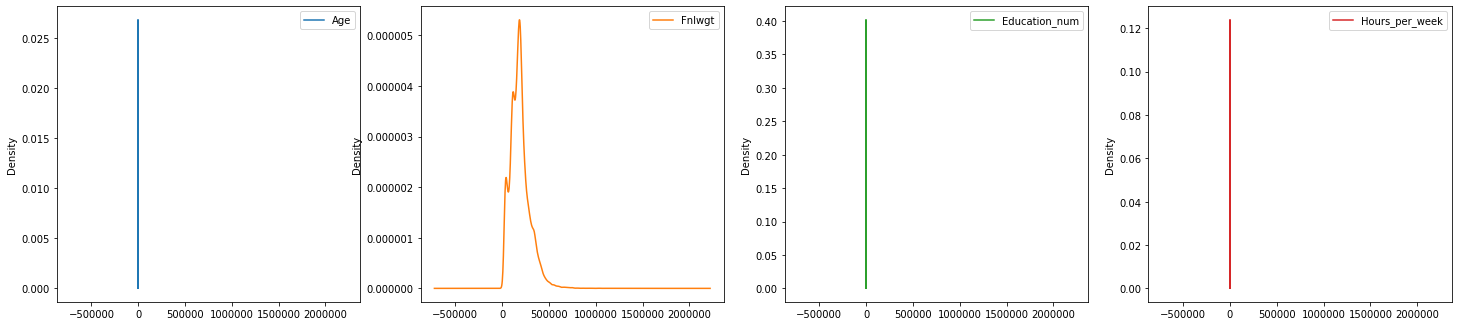

In [76]:

dfc.plot(kind='kde',subplots=True, layout=(4,4),figsize=(25,25))
plt.show()

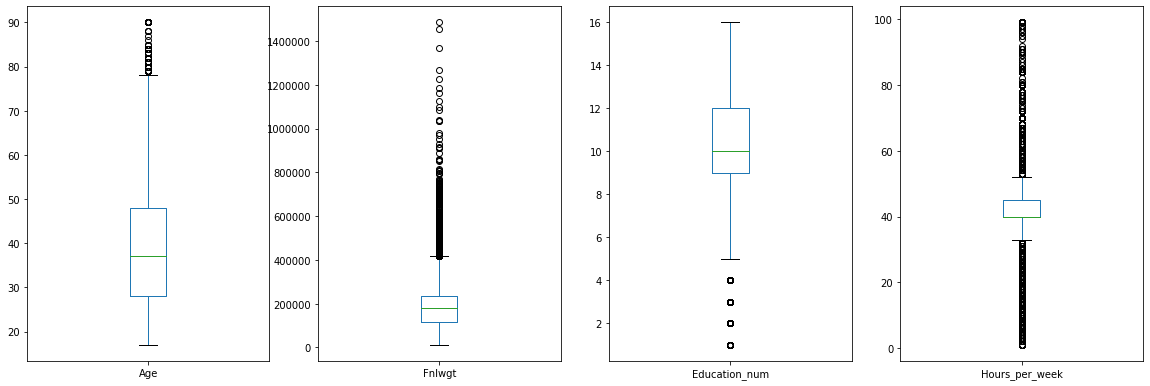

In [77]:
dfc.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,30))
plt.show()

Outliers is present in Age, Fnlwgt, Education_num and Hours_per_week

# Outliers

In [78]:
## Let's remove the Outliers using zscore method

from scipy.stats import zscore

In [79]:
outliers=dfc[['Age','Fnlwgt','Education_num','Hours_per_week']]

In [80]:
z=np.abs(zscore(outliers))
z

array([[0.83709708, 1.0087417 , 1.13477863, 2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 0.03542999]])

In [81]:
dfc_new=dfc[(z<3).all(axis=1)]
dfc_new.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K


In [82]:
dfc_new.shape

(31461, 13)

In [83]:
dfc.shape

(32560, 13)

In [84]:
# Data loss in the Outlier removal process

data_loss=((32560-31461)/32560)*100
data_loss

3.3753071253071254

3.37% of data has been removed in the outliers

# Skewness

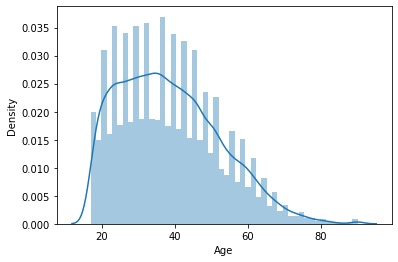

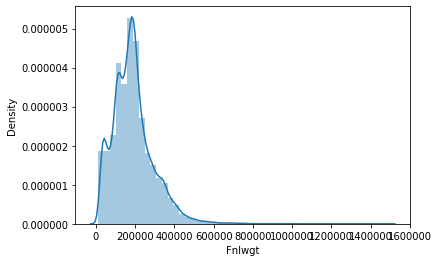

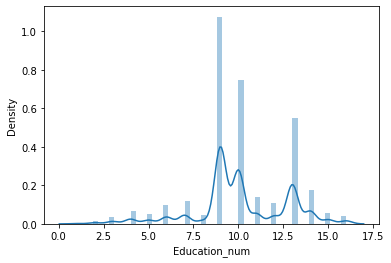

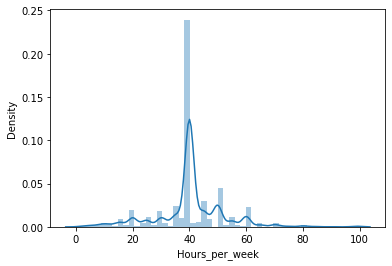

In [85]:
#Checking the Skewness in data before removal
for i in dfc[numerical_data]:
    sns.distplot(dfc[i])
    plt.show()

In [86]:
dfc_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Skewness is present in Fnlwgt. Consider the skewness which is more than -0.5 or 0.5

# Skewness removal using PowerTransformer

In [87]:
# Let's remove the Skewness using Power Transformer

from sklearn.preprocessing import PowerTransformer

In [88]:
scaled=PowerTransformer(method='yeo-johnson')
scaled

PowerTransformer()

In [89]:
skewed=['Fnlwgt']

dfc_new[skewed]=scaled.fit_transform(dfc_new[skewed].values)

In [90]:
dfc_new[skewed].skew()

Fnlwgt   -0.034507
dtype: float64

Hence we have removed the skewness

In [91]:
dfc_new.skew()

Age               0.472279
Fnlwgt           -0.034507
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

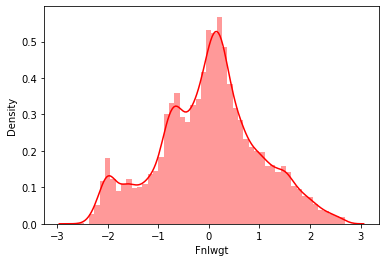

In [92]:
# Viewing the distribution plot after skewness removed.
sns.distplot(dfc_new['Fnlwgt'],color='red')

# Correlation

In [93]:
dfc_new.corr()

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.066519,0.053361,0.097510
Fnlwgt,-0.066519,1.000000,-0.033150,-0.015566
Education_num,0.053361,-0.033150,1.000000,0.160483
Hours_per_week,0.097510,-0.015566,0.160483,1.000000


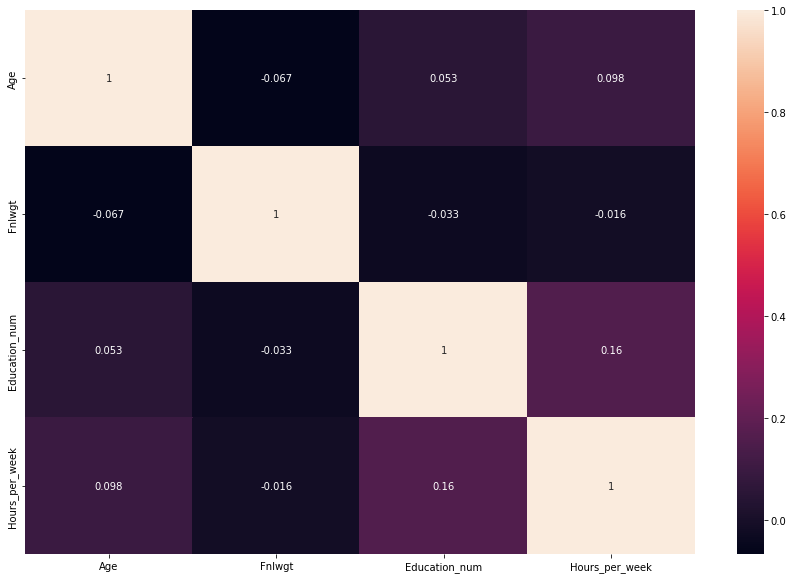

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(dfc_new.corr(),annot=True)

In [95]:
dfc_corr=dfc.corr()
dfc_corr

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.148127
Hours_per_week,0.068756,-0.018770,0.148127,1.000000


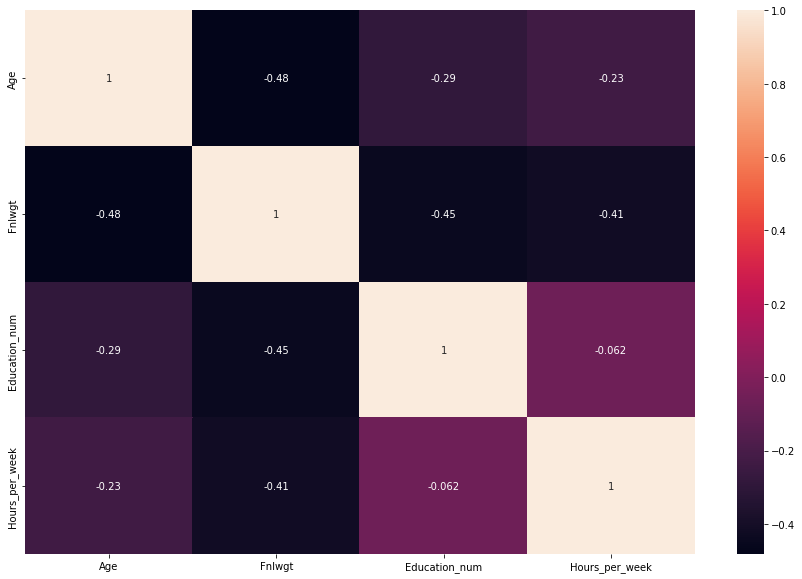

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(dfc_corr.corr(),annot=True)
plt.show()

By analysing, we see there is no high correlation exist. Hence no multicollinearlity present in Data

# Converting the Categorical data to Numerical Data using Label Encoder

In [97]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le

LabelEncoder()

In [98]:
dfc_new[categorical_data]=dfc_new[categorical_data].apply(le.fit_transform)

In [99]:
dfc_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,13,38,0
1,38,3,0.427192,10,9,0,5,1,4,1,40,38,0
2,53,3,0.607320,1,7,2,5,0,2,1,40,38,0
3,28,3,1.487719,8,13,2,9,5,2,0,40,4,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,38,0


We have converted all the categorical data to numerical data. Let's see the correlation for all columns

In [100]:
#Checking the correlation
dfc_new_corr=dfc_new.corr()
dfc_new_corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.001992,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001992,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


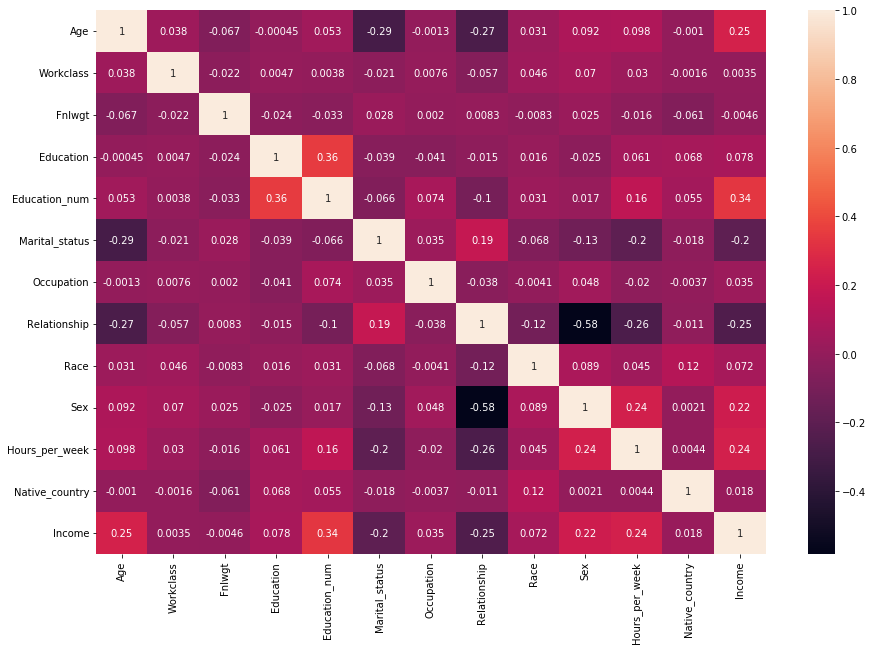

In [101]:
#Viewing the correlation data using the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dfc_new.corr(),annot=True)

# Let's split the data into x and y variable for training and testing

In [102]:
x=dfc_new.drop('Income',axis=1)

In [103]:
x.shape

(31461, 12)

In [104]:
y=dfc_new['Income']

In [105]:
y.shape

(31461,)

# Balancing the Income data using SMOTE

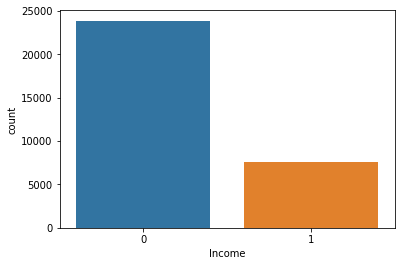

In [106]:
sns.countplot(dfc_new['Income'])

# Balancing the data using SMOTE Technique

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
SM=SMOTE()
SM

SMOTE()

In [109]:
x,y=SM.fit_resample(x,y)

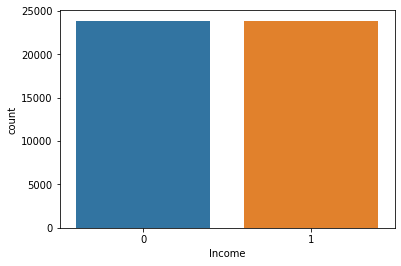

In [110]:
sns.countplot(y)

In [111]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

# Scaling the data using Standard Scaler

In [112]:
sc=StandardScaler()
sc

StandardScaler()

In [113]:
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.77460042,  1.8055118 , -1.18568416, ...,  0.62329574,
        -2.62624273,  0.24577686],
       [-0.17612436, -0.02942452,  0.45512476, ...,  0.62329574,
        -0.15619428,  0.24577686],
       [ 1.01228161, -0.02942452,  0.64687491, ...,  0.62329574,
        -0.15619428,  0.24577686],
       ...,
       [ 0.45769216, -0.02942452, -0.32991789, ..., -1.60437483,
         0.39270538, -5.99156935],
       [ 1.88377932,  1.8055118 ,  0.23125891, ...,  0.62329574,
         1.12457158, -5.82299242],
       [ 0.61614629,  2.72297997, -0.61517963, ..., -1.60437483,
         0.48418865,  0.24577686]])

# Variance Inflation Factor

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [183]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,Age,1.161674
1,Workclass,1.006187
2,Fnlwgt,1.009102
3,Education,1.088715
4,Education_num,1.150201
5,Marital_status,1.139623
6,Occupation,1.018996
7,Relationship,1.937072
8,Race,1.046151
9,Sex,1.774266


There is no high inflation present in data

# Model Building

In [114]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.30,random_state=80)

In [115]:
train_x.shape

(33394, 12)

In [116]:
train_y.shape

(33394,)

In [117]:
test_x.shape

(14312, 12)

In [118]:
test_y.shape

(14312,)

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lg=LogisticRegression()

In [121]:
lg.fit(train_x,train_y)

LogisticRegression()

In [122]:
lg_pred=lg.predict(test_x)
print("Predicted value:",lg_pred)

Predicted value: [1 0 1 ... 1 1 0]


In [123]:
lg.coef_

array([[ 0.55441143, -0.17695644,  0.06702695,  0.00855049,  0.90068122,
        -0.40155942, -0.05100862, -0.27849125,  0.1023795 ,  0.23430603,
         0.43444568,  0.00246265]])

In [124]:
lg.intercept_

array([-0.06690418])

In [125]:
lg.score(train_x,train_y)

0.7523806671857219

In [126]:
lg.score(test_x,test_y)

0.7481134712129681

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [128]:
print("Accuracy Score value is:",accuracy_score(test_y,lg_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,lg_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,lg_pred))

Accuracy Score value is: 0.7481134712129681 

Confusion Matrix is:
 [[5169 1988]
 [1617 5538]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      7157
           1       0.74      0.77      0.75      7155

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



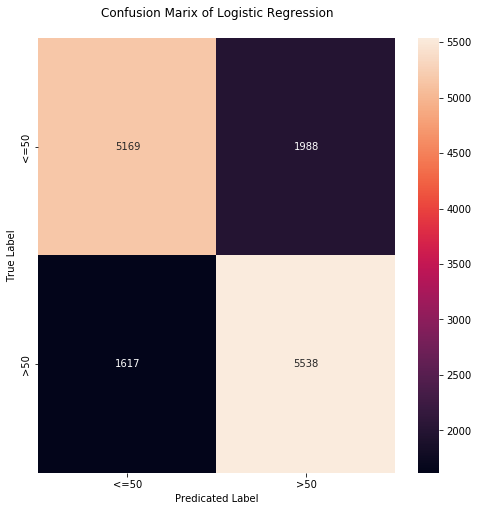

In [129]:
CM=confusion_matrix(test_y,lg_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Logistic Regression\n")
plt.show()

# Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [131]:
dtc_pred=dtc.predict(test_x)
print("Predicted value:\n",dtc_pred)

Predicted value:
 [1 0 1 ... 1 0 1]


In [132]:
print("Accuracy Score value is:",accuracy_score(test_y,dtc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,dtc_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,dtc_pred))

Accuracy Score value is: 0.8169368362213527 

Confusion Matrix is:
 [[5739 1418]
 [1202 5953]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      7157
           1       0.81      0.83      0.82      7155

    accuracy                           0.82     14312
   macro avg       0.82      0.82      0.82     14312
weighted avg       0.82      0.82      0.82     14312



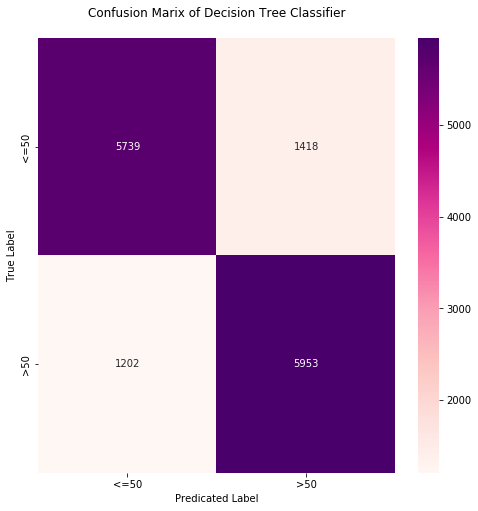

In [133]:
CM=confusion_matrix(test_y,dtc_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="RdPu")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Decision Tree Classifier\n")
plt.show()

# Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [135]:
rfc_pred=rfc.predict(test_x)
print("Predicted value:\n",rfc_pred)

Predicted value:
 [1 0 1 ... 1 0 1]


In [136]:
print("Accuracy Score value is:",accuracy_score(test_y,rfc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,rfc_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,rfc_pred))

Accuracy Score value is: 0.8691307993292342 

Confusion Matrix is:
 [[6037 1120]
 [ 753 6402]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      7157
           1       0.85      0.89      0.87      7155

    accuracy                           0.87     14312
   macro avg       0.87      0.87      0.87     14312
weighted avg       0.87      0.87      0.87     14312



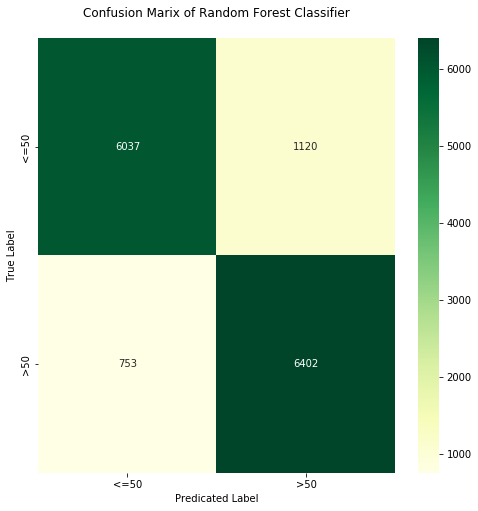

In [137]:
CM=confusion_matrix(test_y,rfc_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="YlGn")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Random Forest Classifier\n")
plt.show()

# Support Vector Classifier

# SVC(kernel='linear')

In [138]:
from sklearn.svm import SVC

svc_linear=SVC(kernel='linear')
svc_linear.fit(train_x,train_y)

SVC(kernel='linear')

In [139]:
svc_linear_pred=svc_linear.predict(test_x)
print("Predicted Value:\n",svc_linear_pred)

Predicted Value:
 [1 0 1 ... 1 1 0]


In [140]:
print("Accuracy Score value is:",accuracy_score(test_y,svc_linear_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,svc_linear_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,svc_linear_pred))

Accuracy Score value is: 0.7544019005030743 

Confusion Matrix is:
 [[4995 2162]
 [1353 5802]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      7157
           1       0.73      0.81      0.77      7155

    accuracy                           0.75     14312
   macro avg       0.76      0.75      0.75     14312
weighted avg       0.76      0.75      0.75     14312



# SVC(kernel='poly')

In [141]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(train_x,train_y)

SVC(kernel='poly')

In [142]:
svc_poly_pred=svc_poly.predict(test_x)
print("Predicted Value:\n",svc_poly_pred)

Predicted Value:
 [1 1 1 ... 1 0 1]


In [143]:
print("Accuracy Score value is:",accuracy_score(test_y,svc_poly_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,svc_poly_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,svc_poly_pred))

Accuracy Score value is: 0.7887087758524315 

Confusion Matrix is:
 [[4824 2333]
 [ 691 6464]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.67      0.76      7157
           1       0.73      0.90      0.81      7155

    accuracy                           0.79     14312
   macro avg       0.80      0.79      0.79     14312
weighted avg       0.80      0.79      0.79     14312



# SVC(kernel='rbf')

In [144]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(train_x,train_y)

SVC()

In [145]:
svc_rbf_pred=svc_rbf.predict(test_x)
print("Predicted Value:\n",svc_rbf_pred)

Predicted Value:
 [1 1 1 ... 1 0 1]


In [146]:
print("Accuracy Score value is:",accuracy_score(test_y,svc_rbf_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,svc_rbf_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,svc_rbf_pred))

Accuracy Score value is: 0.825321408608161 

Confusion Matrix is:
 [[5482 1675]
 [ 825 6330]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81      7157
           1       0.79      0.88      0.84      7155

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.82     14312
weighted avg       0.83      0.83      0.82     14312



In Suport Vector classifier (kernel='rbf') gives a good accuracy 82.6%

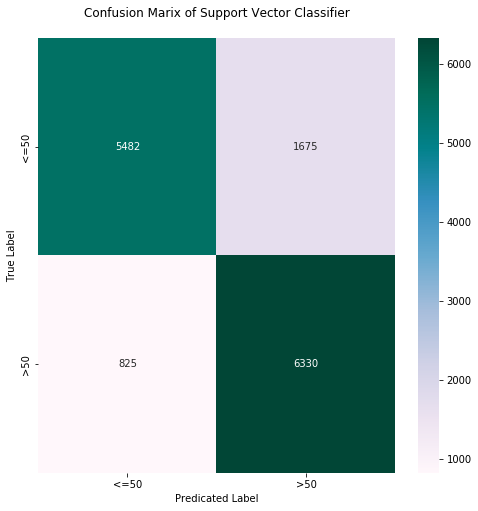

In [147]:
CM=confusion_matrix(test_y,svc_rbf_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="PuBuGn")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Support Vector Classifier\n")
plt.show()

# KNeighbors Classifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [149]:
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [150]:
knn_pred=knn.predict(test_x)
print("Predicted Value:\n",knn_pred)

Predicted Value:
 [1 1 1 ... 1 1 1]


In [151]:
print("Accuracy Score value is:",accuracy_score(test_y,knn_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,knn_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,knn_pred))

Accuracy Score value is: 0.8295835662381219 

Confusion Matrix is:
 [[5548 1609]
 [ 830 6325]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      7157
           1       0.80      0.88      0.84      7155

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



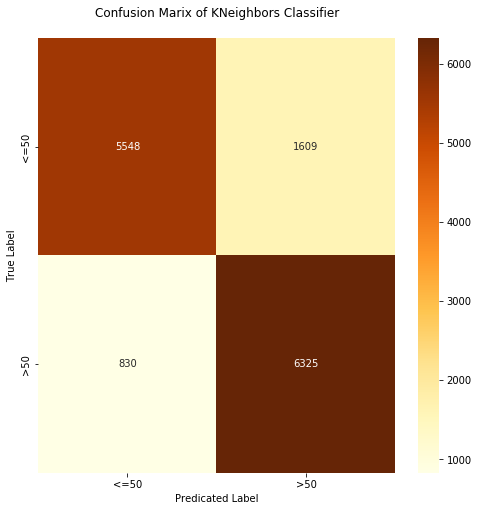

In [152]:
CM=confusion_matrix(test_y,knn_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="YlOrBr")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of KNeighbors Classifier\n")
plt.show()

# Grandient Boosting Classifier

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(train_x,train_y)

GradientBoostingClassifier()

In [154]:
gbc_pred=gbc.predict(test_x)
print("Predicted Value:\n",gbc_pred)

Predicted Value:
 [1 1 1 ... 1 0 0]


In [155]:
print("Accuracy Score value is:",accuracy_score(test_y,gbc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,gbc_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,gbc_pred))

Accuracy Score value is: 0.8345444382336501 

Confusion Matrix is:
 [[5682 1475]
 [ 893 6262]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      7157
           1       0.81      0.88      0.84      7155

    accuracy                           0.83     14312
   macro avg       0.84      0.83      0.83     14312
weighted avg       0.84      0.83      0.83     14312



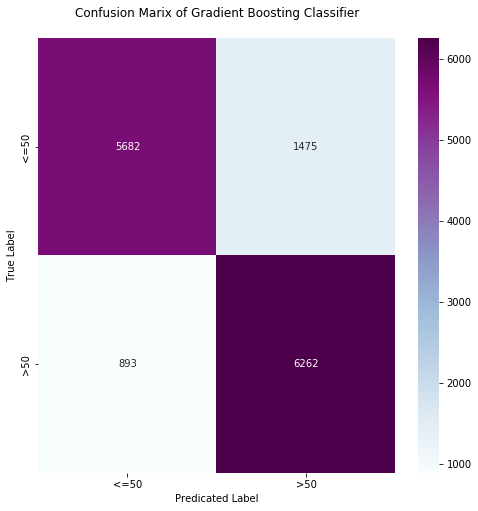

In [156]:
CM=confusion_matrix(test_y,gbc_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="BuPu")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Gradient Boosting Classifier\n")
plt.show()

# XGBClassifier

In [157]:
from xgboost import XGBClassifier

In [158]:
xgb=XGBClassifier()
xgb.fit(train_x,train_y)

[20:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
xgb_pred=xgb.predict(test_x)
print("Predicted Value:\n",xgb_pred)

Predicted Value:
 [1 1 1 ... 1 0 1]


In [160]:
print("Accuracy Score value is:",accuracy_score(test_y,xgb_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,xgb_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,xgb_pred))

Accuracy Score value is: 0.8532001117942984 

Confusion Matrix is:
 [[5869 1288]
 [ 813 6342]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      7157
           1       0.83      0.89      0.86      7155

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



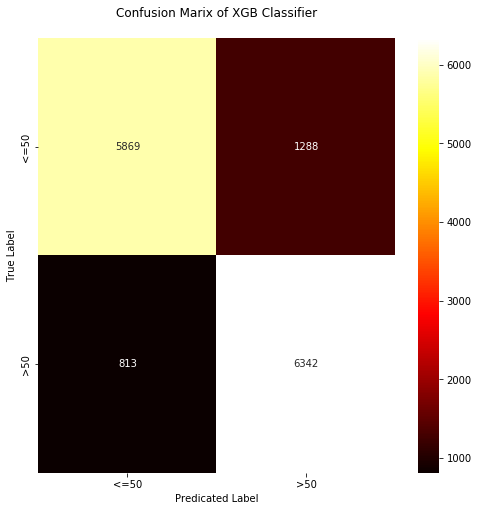

In [161]:
CM=confusion_matrix(test_y,xgb_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="hot")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of XGB Classifier\n")
plt.show()

# Voting Classifier

In [162]:
from sklearn.ensemble import VotingClassifier

In [163]:
voting_clf=VotingClassifier(estimators=[('XGB',xgb),('GBC',gbc),('DTC',dtc),('RFC',rfc)],voting='hard')
voting_clf.fit(train_x,train_y)

[20:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1,
                                 

In [164]:
voting_clf_pred=voting_clf.predict(test_x)
print("Predicted Value:\n",voting_clf_pred)

Predicted Value:
 [1 0 1 ... 1 0 1]


In [165]:
print("Accuracy Score value is:",accuracy_score(test_y,voting_clf_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,voting_clf_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,voting_clf_pred))

Accuracy Score value is: 0.8581609837898267 

Confusion Matrix is:
 [[6082 1075]
 [ 955 6200]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      7157
           1       0.85      0.87      0.86      7155

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



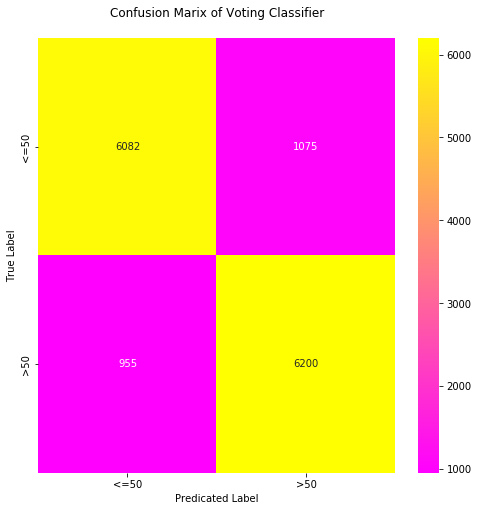

In [166]:
CM=confusion_matrix(test_y,voting_clf_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="spring")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Voting Classifier\n")
plt.show()

# AdaBoost Classifier

In [167]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(train_x,train_y)

AdaBoostClassifier()

In [168]:
ada_pred=ada.predict(test_x)
print("Predicted Value:\n",ada_pred)

Predicted Value:
 [1 1 1 ... 1 0 1]


In [169]:
print("Accuracy Score value is:",accuracy_score(test_y,ada_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,ada_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,ada_pred))

Accuracy Score value is: 0.8238541084404696 

Confusion Matrix is:
 [[5630 1527]
 [ 994 6161]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      7157
           1       0.80      0.86      0.83      7155

    accuracy                           0.82     14312
   macro avg       0.83      0.82      0.82     14312
weighted avg       0.83      0.82      0.82     14312



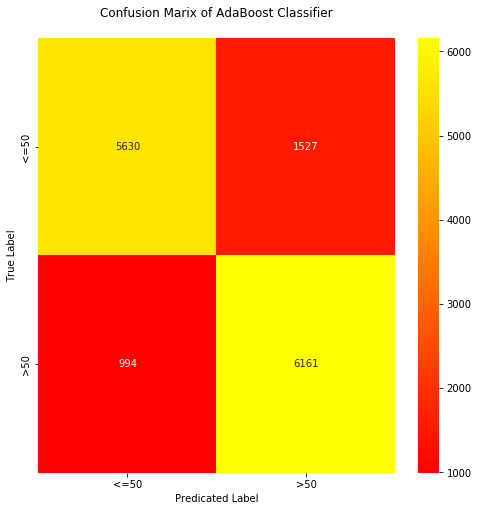

In [170]:
CM=confusion_matrix(test_y,ada_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="autumn")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of AdaBoost Classifier\n")
plt.show()

# Principle Component Analysis

In [184]:
from sklearn.decomposition import PCA

pca=PCA(n_components=8)
pca.fit(train_x,train_y)

PCA(n_components=8)

In [185]:
pca.explained_variance_

array([2.16758705, 1.28058284, 1.14897074, 1.12148974, 1.02260778,
       0.98736048, 0.9515844 , 0.84872624])

In [186]:
pca.components_

array([[-0.31567582, -0.05875501,  0.0386258 , -0.11783572, -0.23698094,
         0.32795972, -0.04630213,  0.54730698, -0.16962658, -0.48889532,
        -0.3818672 , -0.04998681],
       [ 0.01199169,  0.10124621,  0.14822064, -0.61904679, -0.56751708,
         0.07732089, -0.01935518, -0.23518462, -0.13109563,  0.33066151,
        -0.06613154, -0.26415914],
       [-0.02935753, -0.16742772,  0.21826718,  0.16559758,  0.27715873,
         0.00120882,  0.1470364 , -0.03138802, -0.62657471,  0.0088307 ,
         0.13553374, -0.62094798],
       [ 0.52228653, -0.12831065, -0.29661664, -0.10000409, -0.14137392,
        -0.50829633, -0.43367452,  0.14210311, -0.17827656, -0.27051105,
        -0.0608821 , -0.132238  ],
       [ 0.19210789,  0.591445  , -0.50204894, -0.11357539,  0.10981578,
         0.02479071,  0.53239996,  0.05330414, -0.11217887, -0.08726501,
        -0.1235747 , -0.11789715],
       [ 0.26208159, -0.59873123,  0.12543905, -0.23161316,  0.02935371,
        -0.15511329,  

In [171]:
for clf in (lg,dtc,rfc,svc_linear,svc_poly,svc_rbf,voting_clf,knn,gbc,xgb,ada):
    clf.fit(train_x,train_y)
    clf_pred=clf.predict(test_x)
    print(clf.__class__.__name__,accuracy_score(test_y,clf_pred))

LogisticRegression 0.7481134712129681
DecisionTreeClassifier 0.8163778647288988
RandomForestClassifier 0.8687814421464505
SVC 0.7544019005030743
SVC 0.7887087758524315
SVC 0.825321408608161
[20:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.85809111235327
KNeighborsClassifier 0.8295835662381219
GradientBoostingClassifier 0.8345444382336501
[20:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.8532001117942984
AdaBoostClassifier 0.8238541084404696

Among all the model accuracy, Random Forest Classifier model gives the best accuracy score 87%. 

# Cross Validation Score

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
# Cross validation score for Logistic Regression

print("Cross Validation Score for Logistic Regression is:",cross_val_score(lg,x,y,cv=10).mean())

Cross Validation Score for Logistic Regression is: 0.7483756729050031


In [174]:
# Cross validation score for Decision Tree Classifier

print("Cross Validation Score for Decision Tree Classifier is:",cross_val_score(dtc,x,y,cv=10).mean())

Cross Validation Score for Decision Tree Classifier is: 0.8250970683729925


In [175]:
# Cross validation score for Random Forest Classifier

print("Cross Validation Score for Random Forest Classifier is:",cross_val_score(rfc,x,y,cv=10).mean())

Cross Validation Score for Random Forest Classifier is: 0.8773129850287837


In [176]:
# Cross validation score for KNeighbors Classifier

print("Cross Validation Score for KNeighbors Classifier is:",cross_val_score(knn,x,y,cv=10).mean())

Cross Validation Score for KNeighbors Classifier is: 0.8331663390848008


In [177]:
# Cross validation score for Gradient Boosting Classifier

print("Cross Validation Score for Gradent Boosting Classifier is:",cross_val_score(gbc,x,y,cv=10).mean())

Cross Validation Score for Gradent Boosting Classifier is: 0.834466459000416


In [179]:
# Cross validation score for XGB Classifier

print("Cross Validation Score for XGB Classifier is:",cross_val_score(xgb,x,y,cv=10).mean())

[21:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [180]:
# Cross validation score for Ada Boost Classifier

print("Cross Validation Score for Ada Boost Classifier is:",cross_val_score(ada,x,y,cv=10).mean())

Cross Validation Score for Ada Boost Classifier is: 0.8233355523654223


After analysis of various model and cross validation score I choose Random Forest Classifier is my final model

# Hyper parameter Tuning

In [189]:
from sklearn.model_selection import GridSearchCV

In [205]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15],
             'n_estimators':[100,200],
             'max_features': ["auto","sqrt","log2"]}

In [206]:
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=parameter,cv=5,n_jobs=-1,verbose=3)

In [207]:
grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             verbose=3)

In [208]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 200}

# Final Model

In [209]:
final_model=RandomForestClassifier(criterion='gini',max_depth=15,max_features='sqrt',n_estimators=200)

In [211]:
final_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=200)

In [212]:
final_model_pred=final_model.predict(test_x)
print("Predicted value:\n",final_model_pred)

Predicted value:
 [1 1 1 ... 1 0 1]


In [213]:
print("Accuracy Score value is:",accuracy_score(test_y,final_model_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,final_model_pred),"\n")
print("Classification Report is:\n",classification_report(test_y,final_model_pred))

Accuracy Score value is: 0.8583705980994969 

Confusion Matrix is:
 [[5780 1377]
 [ 650 6505]] 

Classification Report is:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      7157
           1       0.83      0.91      0.87      7155

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



After tuning we got the accuracy score in Random Forest Classifier is 85.8%. Which is good accuracy for our census income prediction

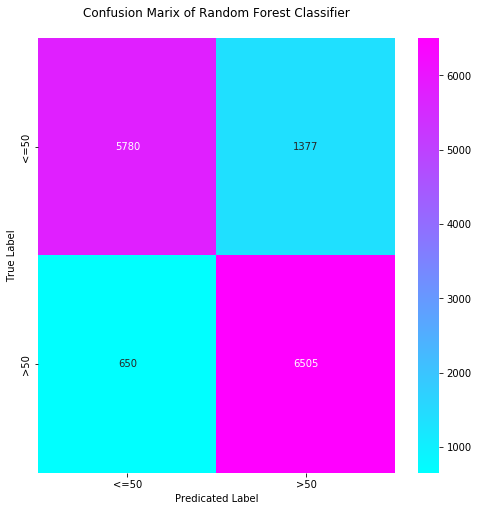

In [214]:
CM=confusion_matrix(test_y,final_model_pred)

x_axis=['<=50','>50']
y_axis=['<=50','>50']

figure,axes=plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot=True, linecolor='black',xticklabels=x_axis,yticklabels=y_axis,axes=axes,fmt = ".0f",cmap="cool")
plt.xlabel("Predicated Label")
plt.ylabel("True Label")
plt.title("Confusion Marix of Random Forest Classifier\n")
plt.show()

# ROC AUC Curve

In [216]:
from sklearn.metrics import roc_auc_score,roc_curve

In [218]:
y_prob=final_model.fit(train_x,train_y).predict_proba(test_x)
y_prob

array([[0.06472615, 0.93527385],
       [0.492443  , 0.507557  ],
       [0.06298863, 0.93701137],
       ...,
       [0.05914488, 0.94085512],
       [0.80522586, 0.19477414],
       [0.42099833, 0.57900167]])

In [221]:
fpr,tpr,thresholds=roc_curve(test_y,final_model_pred)

In [222]:
fpr

array([0.        , 0.19239905, 1.        ])

In [223]:
tpr

array([0.        , 0.90915444, 1.        ])

In [224]:
thresholds

array([2, 1, 0])

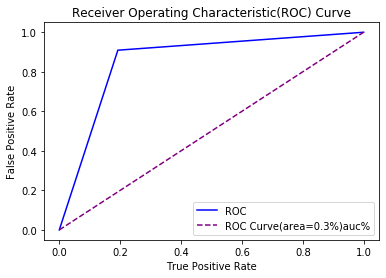

In [225]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='purple',linestyle='--',label='ROC Curve(area=0.3%)auc%')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

In [226]:
from sklearn.metrics import plot_roc_curve

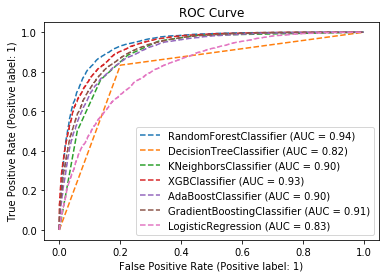

In [240]:
dist=plot_roc_curve(rfc,test_x,test_y,linestyle='--')
plot_roc_curve(dtc,test_x,test_y,ax=dist.ax_,linestyle='--')
plot_roc_curve(knn,test_x,test_y,ax=dist.ax_,linestyle='--')
plot_roc_curve(xgb,test_x,test_y,ax=dist.ax_,linestyle='--')
plot_roc_curve(ada,test_x,test_y,ax=dist.ax_,linestyle='--')
plot_roc_curve(gbc,test_x,test_y,ax=dist.ax_,linestyle='--')
plot_roc_curve(lg,test_x,test_y,ax=dist.ax_,linestyle='--')
plt.title("ROC Curve")
plt.show()


# Saving the Model

In [231]:
import pickle

In [233]:
filename='Census_income_prediction.pickle'

In [234]:
pickle.dump(final_model,open(filename,'wb'))

In [235]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([1, 1, 1, ..., 1, 0, 1])

In [236]:
loaded_model.score(train_x,train_y)

0.9143558723123915

In [237]:
loaded_model.score(test_x,test_y)

0.8587199552822806

In [238]:
df=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=["Predicted","Actual"])
df

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,1,1,1,0,1,0,1,1,1,0,...,1,1,0,1,0,1,0,1,0,1
Actual,1,1,1,0,0,1,1,0,1,0,...,1,1,0,1,0,1,0,1,0,1


Here is the comparison of predicted value and actual value for Census income

In [239]:
df.to_csv("Census_predicted_income.csv")